# Logistic Regression

🎯 Up until now, you have been modelling a regression task. This time, you are going to be modelling a classification task, on the famous Titanic dataset.

👇 Load the `titanic.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

<details>
    <summary>💡Hint</summary>
    The dataset is located in a parent directory, you should use <code>../</code> in order to find it.
</details>

In [1]:
# YOUR CODE HERE
import pandas as pd
import numpy as np

titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset_description.txt). Make sure to refer to it throughout the day.

# 1. Model evaluation

👇 We want to predict whether a passenger survived (`Survived`) the Titanic disaster, according to the following features:

- The class in which she/he was travelling (`Pclass`)
- The number of siblings/spouses he had onboard (`SibSp`)
- The number of parents/children he had onboard (`Parch`)
- The fare he paid for the ticket (`Fare`)

❓How accurate would a LogisticRegression model be at such a task? Save the accuracy under variable name `accuracy`.

In [31]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

X = titanic[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = titanic['Survived']

model = LogisticRegression()
model.fit(X, y)

accuracy = model.score(X,y)
accuracy

0.6879910213243546

In [34]:
titanic.Survived.sum()/len(titanic)

0.3838383838383838

### ☑️ Check your code

In [33]:
from nbresult import ChallengeResult

result = ChallengeResult('accuracy',
                         accuracy = accuracy
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_accuracy.py::TestAccuracy::test_accuracy PASSED               [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/accuracy.pickle

git commit -m 'Completed accuracy step'

git push origin master


# 2. In depth diagnosis

❓We've evaluated the accuracy of the model at predicting, but we want to investigate its performance in more depth. Is the model overfitting? underfitting? How many learning examples does it need to learn optimally on the given features?

array([ 71, 106, 142, 178, 213, 249, 284, 320, 356, 391, 427, 462, 498,
       534, 569, 605, 640, 676])

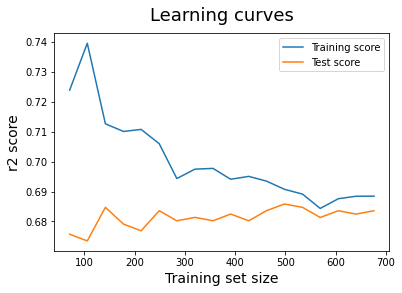

In [44]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


X = titanic[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = titanic['Survived']

model = LogisticRegression()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes = np.arange(0.1,1,0.05), shuffle=True)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
train_sizes



<details>
<summary> ℹ️ Once you have completed your diagnosis, unfold this cell </summary>   
    
<br/>
You should have plotted the learning curves.

👉 The curves should have converged:
- The model is not overfitting (no variance): it generalizes well.

👉 The test score stops increasing around 500 training observations:
- The model does not need more than 500 training observations to perform optimally on the given features.
    
</details>


# 3. Reduced training size

👇 Evaluate a model on the training size suggested by the curves. Are you able to maintain a similar accuracy? Save the new accuracy under variable name `reduced_training_accuracy`

In [35]:
# YOUR CODE HERE
reduced_titanic = titanic[:500]

X = reduced_titanic[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = reduced_titanic['Survived']

model = LogisticRegression()
model.fit(X, y)

reduced_training_accuracy = model.score(X,y)
reduced_training_accuracy


0.656

ℹ️ The accuracy should be the nearly the same, with a reduced computational expense.

### ☑️ Check your code

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_accuracy',
                         accuracy = reduced_training_accuracy
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_reduced_accuracy.py::TestReduced_accuracy::test_accuracy PASSED [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/reduced_accuracy.pickle

git commit -m 'Completed reduced_accuracy step'

git push origin master


# 4. Predictions

❓ Did the following person survive the Titanic disaster?

- Travelled in class 1 (`Pclass`)
- Had no spouse or sibblings on board(`SibSp`)
- Had no parents or children on board (`Parch`)
- Paid 15 for his ticket (`Fare`)

⚠️ Make sure the model you use for predicting has the **least computational expense possible**. Save the prediction under variable name `prediction`.

In [37]:
# YOUR CODE HERE
model.predict([[1,0,0,15]])

/Users/humbert/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

❓ What is the probability that the person survived? Compute your answer and save it under variable name `probability`.

In [0]:
# YOUR CODE HERE


### ☑️ Check your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('predictions',
                         prediction = prediction,
                         probability = probability
)

result.write()
print(result.check())

# 🏁